# Versuch 243: Thermisches Rauschen

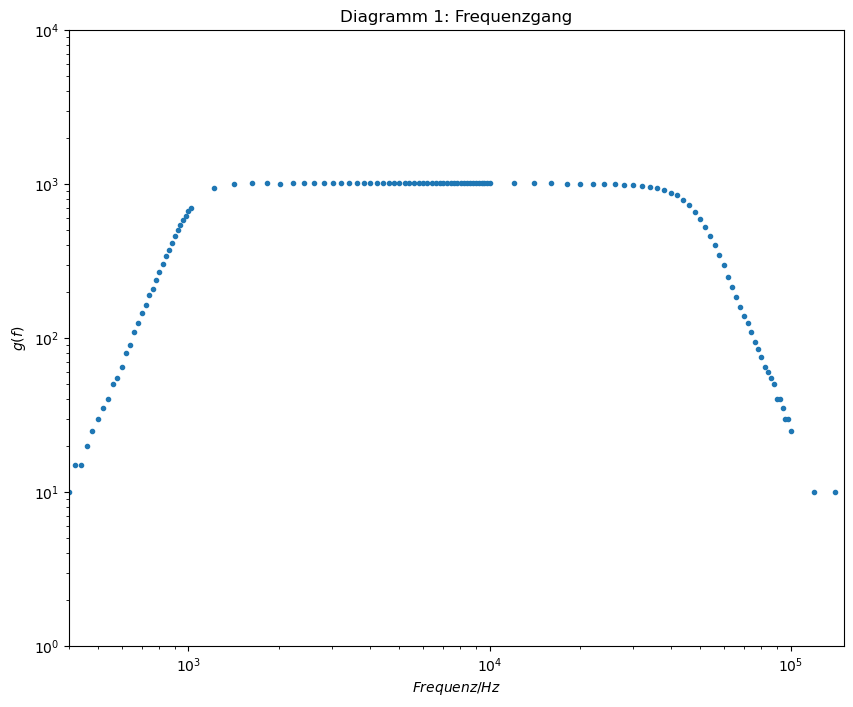

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('default')
plt.rcParams["figure.figsize"][0] = 10
plt.rcParams["figure.figsize"][1] = 8
plt.rcParams['errorbar.capsize']=3


f, U_aus = np.loadtxt('243.txt', skiprows=1, usecols=(0,1), unpack=True)

D=1e-3
U_ein=0.20
g=U_aus/(U_ein * D)

plt.loglog(f,g,linestyle="None", marker=".")
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.xlabel(r'$Frequenz / Hz$')
plt.ylabel(r'$g(f)$')
plt.title("Diagramm 1: Frequenzgang")
plt.ylim(1,10**4)
plt.savefig('Diagramm1.pdf',format='PDF')

Fit: V=1010.6477188028692 +- 0.9365517087776218 W1=1027.307794990416 +- 1.7219882203688384 W2=46310.48480685528 +- 79.02065269868703 n1=5.093926773687783 +- 0.046523369350804034 n2=4.59708873284462 +- 0.034986165554879434


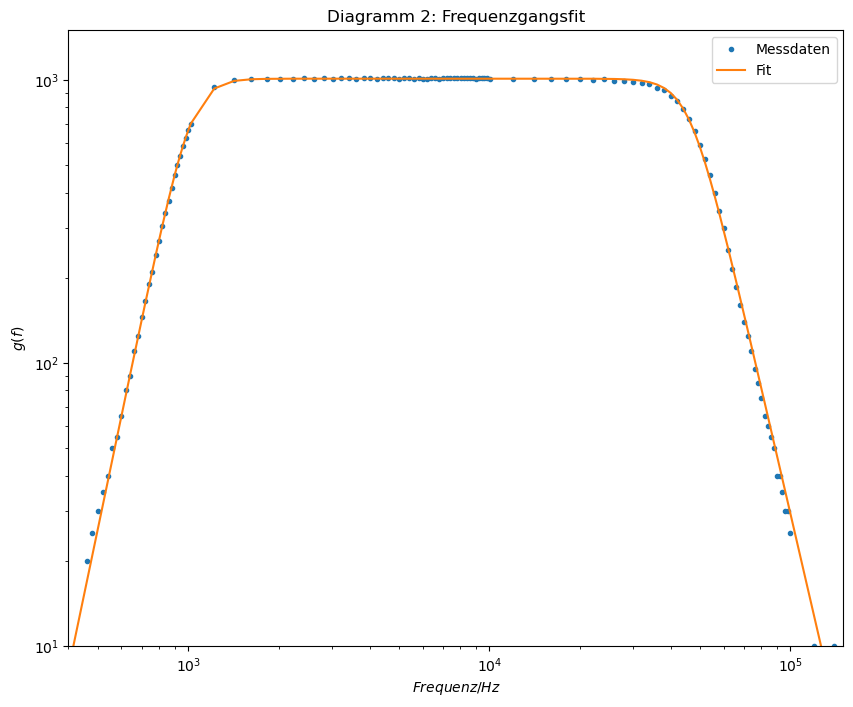

In [2]:
x=18
y=31

from scipy.optimize import curve_fit
def fit_func(f, V, W1, W2, n1, n2):
    return V/(np.sqrt(1+1/(f/W1)**(2*n1))*np.sqrt(1+(f/W2)**(2*n2)))

p0 = [1000, 1000, 50000, 5, 5]
popt, pcov = curve_fit(fit_func, f[x:-y], g[x:-y], p0)


plt.loglog(f[x:-y], g[x:-y], linestyle='None', marker='.', label='Messdaten')
plt.loglog(f, fit_func(f, *popt), label='Fit')
plt.axis([4E2, 1.5e5, 10, 1.5E3])
plt.xlabel(r'$Frequenz / Hz$')
plt.ylabel(r'$g(f)$')
plt.title("Diagramm 2: Frequenzgangsfit")
plt.legend(loc='best')


print('Fit: V={} +- {}'.format(popt[0],np.sqrt(pcov[0,0])), 'W1={} +- {}'.format(popt[1],np.sqrt(pcov[1,1])), 'W2={} +- {}'.format(popt[2],np.sqrt(pcov[2,2])), 'n1={} +- {}'.format(popt[3],np.sqrt(pcov[3,3])), 'n2={} +- {}'.format(popt[4],np.sqrt(pcov[4,4])))
plt.savefig('Diagramm2.pdf', format='PDF')

In [3]:
import scipy.integrate as integrate

def fit_func_square(f,V,W1,W2,n1,n2):
    return fit_func(f,V,W1,W2,n1,n2)**2
B=integrate.quad(fit_func_square, f[x], f[-y], args=tuple(popt))

print('Das Integral beträgt: {value: .4e}'.format(value=B[0]))

Das Integral beträgt:  4.7169e+10


chi^2 0.12278849767413408 
 chi_red^2:  0.024557699534826817
Wahrscheinlichkeit P = 99.97310106%


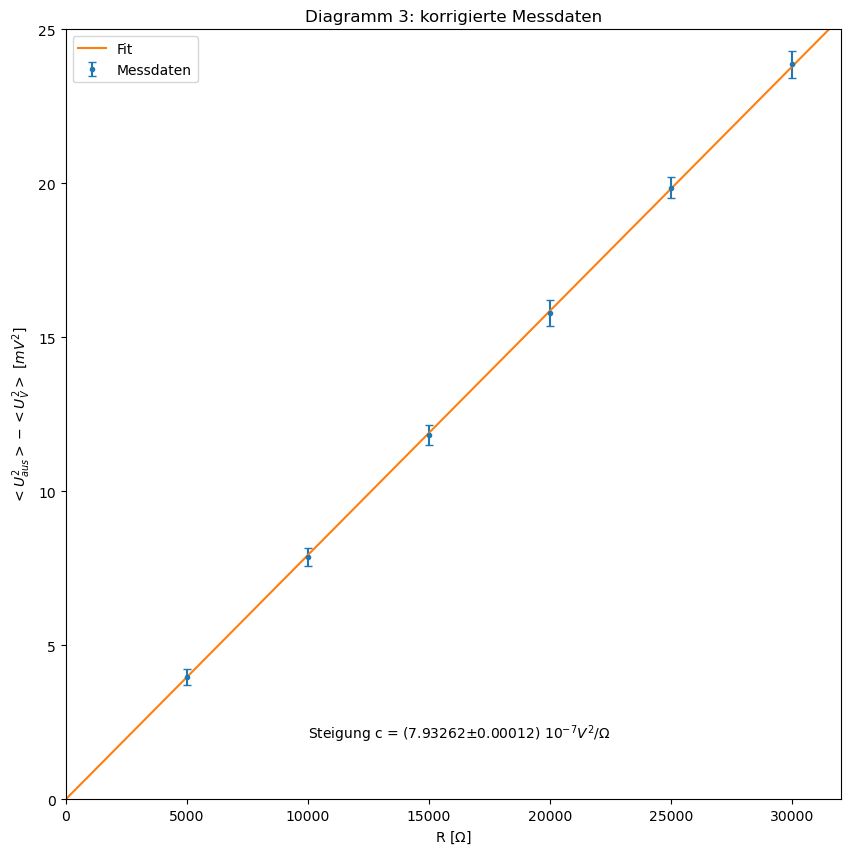

In [4]:
R=np.array([5000,10000,15000,20000,25000,30000])
U_aus=np.array([2.410,3.117,3.697,4.199,4.658,5.069])
fehler_U_aus=np.array([0.0093,0.0114,0.0127,0.0186,0.0100,0.0184]) 
U_V=1.3538
fehler_U_V=0.00582
D=U_aus**2-U_V**2
fehler_D=np.sqrt(2*U_aus*fehler_U_aus+2*U_V*fehler_U_V)

plt.figure(figsize=(10,10))
plt.errorbar(R, D, yerr=fehler_D, fmt='.', label='Messdaten')
plt.axis([0,3.2e4,0,25])
plt.xlabel('R [$\Omega$]')
plt.ylabel('$ <U_{aus}^2 > - <U_{V}^2>$ $[mV^2] $')
plt.title('Diagramm 3: korrigierte Messdaten')

def linear(x, c):
    return c*x
x = np.linspace(0,32000, 10000)
popt, pcov = curve_fit(linear, R, D)
plt.plot(x, linear(x, *popt), label='Fit')
plt.legend(loc='upper left')
plt.annotate('\nSteigung c = (' + str(round(10**4*popt[0], 5))+ '$  \pm $' + str(round(np.sqrt(10**4*pcov[0,0]), 5)) + ') $10^{-7}V^2/ \Omega$', (10000, 2) )
plt.savefig("OriginalEundCa3Boltzmannkonstante.pdf", orientation = 'landscape')

chisquare = np.sum(((linear(R,*popt)-D)**2/fehler_D**2))
dof= 5
chisquare_red=chisquare/dof
print('chi^2', chisquare, '\n', 'chi_red^2: ', chisquare_red)

from scipy.stats import chi2
prob=round(1-chi2.cdf(chisquare, dof),10)*100
print('Wahrscheinlichkeit P = ' + str(prob) + '%')
plt.savefig('Diagramm3.pdf',format='PDF')

In [5]:
T= 22.6+273.15
dT=0.2
k_B = popt[0]/(4*(T)*B[0])*1e-06
print('k_b', k_B, 'J/K')
sys_fehler = k_B*np.sqrt((0.02)**2+(dT/(T))**2) 
print('sys: ', sys_fehler, 'J/K')
stat_fehler = k_B*np.sqrt(pcov[0,0])/popt[0]
print('stat: ', stat_fehler, 'J/K') 
print('sys+stat',  np.sqrt(sys_fehler**2+stat_fehler**2), 'J/K')

k_b 1.4215950927108054e-23 J/K
sys:  2.8448149944843233e-25 J/K
stat:  2.1401623883155225e-26 J/K
sys+stat 2.852853887482926e-25 J/K


In [6]:
k_Lit = 1.380649 *10**-23
sigma = (k_B-k_Lit)/(np.sqrt(sys_fehler**2+stat_fehler**2))
print('Sigmaumgebung:', sigma)
print('Verhältnis Bolzmann-Literatur',k_B/k_Lit)

Sigmaumgebung: 1.4352677818677917
Verhältnis Bolzmann-Literatur 1.02965713422514
